In [1]:
library(GLMsData)
library(statmod)
library(MASS)
library(splines)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [2]:
data(nitrogen)

In [3]:
str(nitrogen)

'data.frame':	24 obs. of  3 variables:
 $ Fert  : int  0 0 0 48 48 48 96 96 96 144 ...
 $ Source: int  0 0 0 0 0 0 0 0 0 0 ...
 $ SoilN : num  4.53 5.46 4.77 6.17 9.3 ...


In [5]:
nitrogen

Fert,Source,SoilN
0,0,4.53
0,0,5.46
0,0,4.77
48,0,6.17
48,0,9.30
48,0,8.29
96,0,11.30
96,0,16.58
96,0,16.24
144,0,24.61


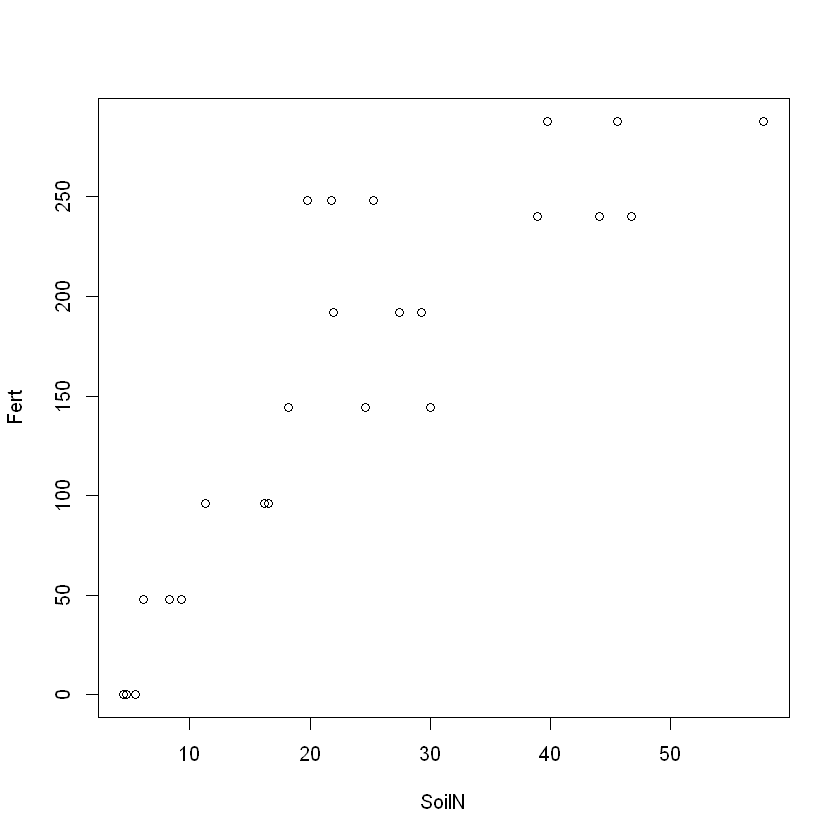

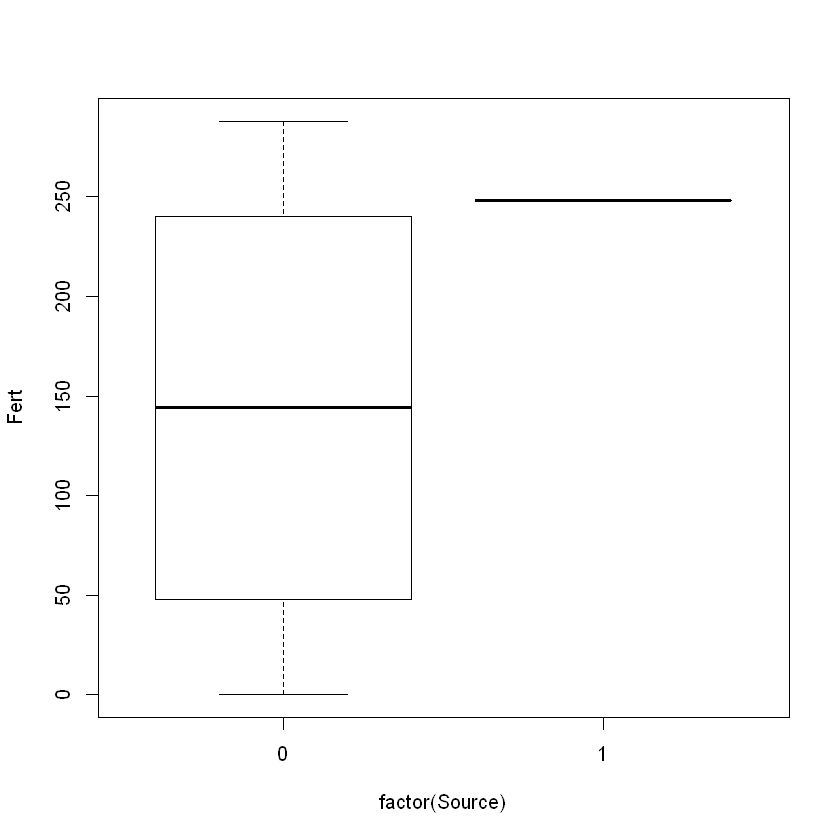

In [6]:
with(nitrogen, {
    plot(Fert ~ SoilN)
    plot(Fert ~ factor(Source))
})

In [9]:
glm.1 <- glm(Fert ~ SoilN * factor(Source), data=nitrogen, family = Gamma(link="log"), subset=(Fert != 0))

In [10]:
coef(summary(glm.1))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),4.02001276,0.132226519,30.4024699,2.923870e-16
SoilN,0.03593795,0.004250565,8.4548645,1.705308e-07
factor(Source)1,1.49341598,1.520984079,0.9818748,3.399298e-01
SoilN:factor(Source)1,-0.03593795,0.067807374,-0.5300006,6.029658e-01


In [11]:
anova(glm.1, test="F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,20,6.051326,NA,NA
SoilN,1,3.36633100,19,2.684995,46.9950467,2.792592e-06
factor(Source),1,1.41251032,18,1.272485,19.7190913,3.585529e-04
SoilN:factor(Source),1,0.01992017,17,1.252565,0.2780919,6.047693e-01


In [12]:
gof.dev <- deviance(glm.1)
gof.pearson <- sum(glm.1$weights * glm.1$residuals^2)

pchisq(gof.dev, df=df.residual(glm.1), lower.tail = FALSE)
pchisq(gof.pearson, df=df.residual(glm.1), lower.tail = FALSE)

gof.dev / df.residual(glm.1)
gof.pearson / df.residual(glm.1)

[1] 0.9999999

[1] 0.9999999

[1] 0.07368028

[1] 0.07163161

Warning message in plot.window(...):
""terms" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""terms" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""terms" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""terms" is not a graphical parameter"Warning message in box(...):
""terms" is not a graphical parameter"Warning message in title(...):
""terms" is not a graphical parameter"Warning message in termplot(glm.1, partial.resid = TRUE):
"'model' appears to involve interactions: see the help page"


	Shapiro-Wilk normality test

data:  qr1
W = 0.96568, p-value = 0.6369


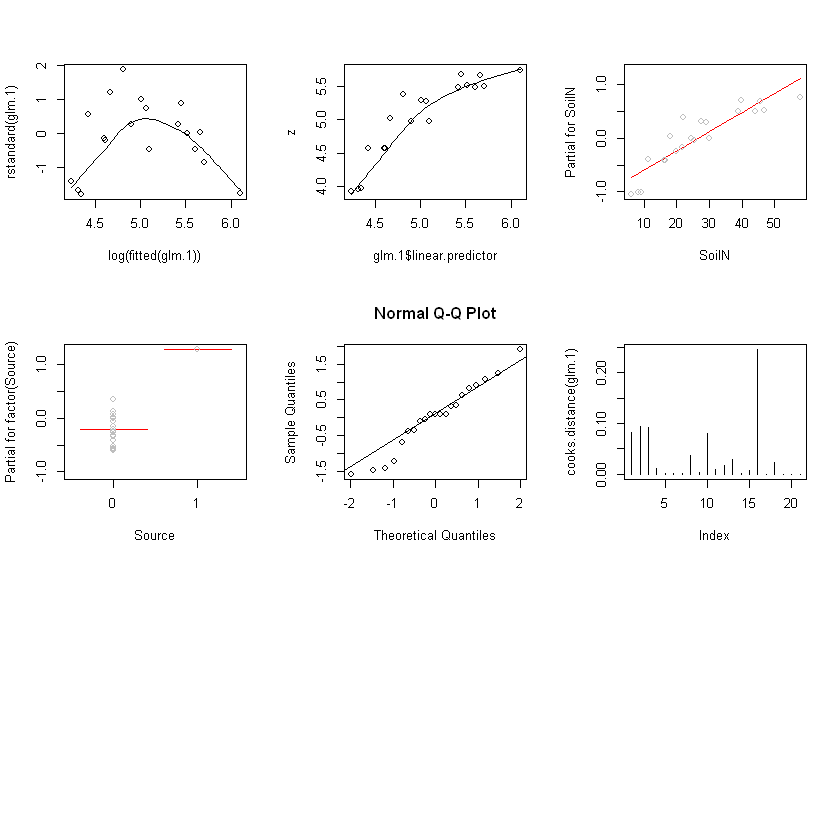

In [14]:
par(mfrow=c(3, 3))

scatter.smooth(rstandard(glm.1) ~ log(fitted(glm.1)))
z <- resid(glm.1, type="working") + glm.1$linear.predictor
scatter.smooth(z ~ glm.1$linear.predictor, terms="SoilN")
termplot(glm.1, partial.resid = TRUE)
qqnorm(qr1 <- qresid(glm.1))
qqline(qr1)
plot(cooks.distance(glm.1), type="h")
shapiro.test(qr1)